# Import Nessesory Libries

In [1]:
# import all the nessecery libries for machine learning project
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Sets

In [2]:
# Import data set
outlet_data=pd.read_csv('Data Storn - Semi final data sets/outlets_data.csv')
freezer_data=pd.read_csv('Data Storn - Semi final data sets/freezer_data.csv')
product_data=pd.read_csv('Data Storn - Semi final data sets/product_data.csv')
sales_data=pd.read_csv('Data Storn - Semi final data sets/sales_data.csv')
week_data=pd.read_csv('Data Storn - Semi final data sets/week_data.csv')
duplicates_predicted=pd.read_csv('duplicates_predicted.csv')



In [3]:
# # create a data frame for each outlate and product
# outlet_data = outlet_data.groupby(['Outlet_ID'])['area(sqft)'].mean().reset_index()

#  remove both rows wich hav eduplicated values for outlet id

outlet_data = outlet_data.drop_duplicates(subset=['Outlet_ID'], keep=False)


In [4]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [5]:
# concatanate duplicates_predicted in to outlet_data
# duplicate predicted are values we got fro the duplicated outlate data by predicting the correct one out of those duplicate using another machine learning modelon other .ipynb file
outlet_data=pd.concat([outlet_data,duplicates_predicted[['Outlet_ID','area(sqft)']]],axis=0)

In [6]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
32,ID9465,6650
33,ID9541,5468
34,ID9672,7165
35,ID9841,2179


In [7]:
# Check for duplicates in column 'A'
duplicates = outlet_data[outlet_data.duplicated(['Outlet_ID'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Outlet_ID, area(sqft)]
Index: []


In [8]:
# get count of null values in each column
null_counts = outlet_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID     0
area(sqft)    0
dtype: int64


In [9]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [10]:
sales_data

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


In [11]:
# get count of null values in each column
null_counts = sales_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
dtype: int64


In [12]:
week_data

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023
5,Week 6,2/6/2023,2/12/2023
6,Week 7,2/13/2023,2/19/2023
7,Week 8,2/20/2023,2/26/2023
8,Week 9,2/27/2023,3/5/2023
9,Week 10,3/6/2023,3/12/2023


In [13]:
# get count of null values in each column
null_counts = week_data.isnull().sum()
# print the counts
print(null_counts)

Week          0
Start Date    0
End Date      0
dtype: int64


# Creating Dtaframes

#### create a data frame for each outlate and product

In [14]:
# create a data frame for each outlate and product
sales_grouped_outlats = sales_data.groupby(['Outlet_ID', 'pid'])['no_units'].sum().reset_index()


In [15]:
sales_grouped_outlats

,Outlet_ID,pid,no_units
0,ID1008,IP1,6970.0
1,ID1008,IP2,7206.0
2,ID1008,IP3,6285.0
3,ID1008,IP4,6486.0
4,ID1008,IP5,6055.0
...,...,...,...
7185,ID9980,IP1,6212.0
7186,ID9980,IP2,7888.0
7187,ID9980,IP3,4999.0
7188,ID9980,IP4,9370.0


In [16]:
# pivot the dataframe to make item_description values as columns
pivoted_df_sales = sales_grouped_outlats.pivot(index='Outlet_ID', columns='pid', values='no_units')

# fill NaN values with 0
pivoted_df_sales.fillna(0, inplace=True)

# resetting the index
pivoted_df_sales = pivoted_df_sales.reset_index()

In [17]:
pivoted_df_sales

pid,Outlet_ID,BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID1008,0.0,0.0,0.0,0.0,0.0,6970.0,7206.0,6285.0,6486.0,6055.0
1,ID1012,636.0,713.0,795.0,572.0,559.0,0.0,0.0,0.0,0.0,0.0
2,ID1024,1703.0,1251.0,1150.0,1388.0,1451.0,0.0,0.0,0.0,0.0,0.0
3,ID1029,1659.0,2190.0,1891.0,1513.0,1109.0,9166.0,7577.0,9158.0,7961.0,6918.0
4,ID1036,567.0,583.0,725.0,564.0,722.0,4934.0,5708.0,6200.0,5526.0,5835.0
...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,1815.0,1878.0,1359.0,1958.0,2257.0,7142.0,6123.0,8809.0,5699.0,11328.0
947,ID9971,0.0,0.0,0.0,0.0,0.0,6390.0,6784.0,7786.0,9162.0,6361.0
948,ID9973,1411.0,1970.0,2001.0,1317.0,1870.0,7341.0,6473.0,8091.0,9850.0,7744.0
949,ID9979,0.0,0.0,0.0,0.0,0.0,5596.0,7372.0,6283.0,5740.0,6901.0


In [18]:
# add columns for each product to the outlet data frame

sales_grouped_outlats=(pd.merge(outlet_data, pivoted_df_sales, on='Outlet_ID', how='left'))

In [19]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID7203,5660,0.0,0.0,0.0,0.0,0.0,6361.0,7295.0,9127.0,5520.0,6443.0
1,ID1878,4138,0.0,0.0,0.0,0.0,0.0,7860.0,6622.0,6856.0,7954.0,6748.0
2,ID1740,5546,0.0,0.0,0.0,0.0,0.0,7625.0,8116.0,7837.0,7192.0,6817.0
3,ID4366,5134,0.0,0.0,0.0,0.0,0.0,6530.0,6259.0,9232.0,8759.0,9524.0
4,ID8358,4100,0.0,0.0,0.0,0.0,0.0,7057.0,9562.0,7652.0,6241.0,8866.0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376.0,2856.0,2366.0,2521.0,2130.0,9851.0,11156.0,7233.0,9251.0,10886.0
947,ID9541,5468,2426.0,2778.0,2163.0,2618.0,2732.0,12116.0,12839.0,14171.0,11826.0,11838.0
948,ID9672,7165,2873.0,3212.0,3686.0,2872.0,3334.0,10869.0,11337.0,11152.0,10102.0,8780.0
949,ID9841,2179,1216.0,1526.0,1270.0,1294.0,1218.0,5702.0,5368.0,5557.0,4374.0,4834.0


#### creating fetures for total item solds for bulk and impuls item

In [20]:
sales_grouped_outlats['tot_bulk_itm'] = sales_grouped_outlats[['BP1', 'BP2', 'BP3', 'BP4', 'BP5']].sum(axis=1)
sales_grouped_outlats['tot_impulse_itm'] = sales_grouped_outlats[['IP1', 'IP2', 'IP3', 'IP4', 'IP5']].sum(axis=1)

In [21]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm
0,ID7203,5660,0.0,0.0,0.0,0.0,0.0,6361.0,7295.0,9127.0,5520.0,6443.0,0.0,34746.0
1,ID1878,4138,0.0,0.0,0.0,0.0,0.0,7860.0,6622.0,6856.0,7954.0,6748.0,0.0,36040.0
2,ID1740,5546,0.0,0.0,0.0,0.0,0.0,7625.0,8116.0,7837.0,7192.0,6817.0,0.0,37587.0
3,ID4366,5134,0.0,0.0,0.0,0.0,0.0,6530.0,6259.0,9232.0,8759.0,9524.0,0.0,40304.0
4,ID8358,4100,0.0,0.0,0.0,0.0,0.0,7057.0,9562.0,7652.0,6241.0,8866.0,0.0,39378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376.0,2856.0,2366.0,2521.0,2130.0,9851.0,11156.0,7233.0,9251.0,10886.0,12249.0,48377.0
947,ID9541,5468,2426.0,2778.0,2163.0,2618.0,2732.0,12116.0,12839.0,14171.0,11826.0,11838.0,12717.0,62790.0
948,ID9672,7165,2873.0,3212.0,3686.0,2872.0,3334.0,10869.0,11337.0,11152.0,10102.0,8780.0,15977.0,52240.0
949,ID9841,2179,1216.0,1526.0,1270.0,1294.0,1218.0,5702.0,5368.0,5557.0,4374.0,4834.0,6524.0,25835.0


#### Creatng feature for Total Icecream Volume sold

In [22]:
sales_grouped_outlats['tot_icecream_vol']=(sales_grouped_outlats['tot_bulk_itm']*1.0)+(sales_grouped_outlats['tot_impulse_itm']*0.2)

In [23]:
sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']] = sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']].astype(int)

In [24]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0


#### Create a feature for total revenew

In [25]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [26]:
sales_grouped_outlats['tot_revnew']=((sales_grouped_outlats['BP1']*1200)+(sales_grouped_outlats['BP2']*1100)+(sales_grouped_outlats['BP3']*1150)+(sales_grouped_outlats['BP4']*1000)+(sales_grouped_outlats['BP5']*1100)+(sales_grouped_outlats['IP1']*100)+(sales_grouped_outlats['IP2']*90)+(sales_grouped_outlats['IP3']*110)+(sales_grouped_outlats['IP4']*100)+(sales_grouped_outlats['IP5']*100)).astype(float)

In [27]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0


#### Features for multiplication of all the bulk value and all the Impuls value

In [28]:
# sales_grouped_outlats['bulk_multi']=sales_grouped_outlats.apply(lambda row: row['BP1'] * row['BP2'] * row['BP3'] * row['BP4'] * row['BP5'], axis=1)
# sales_grouped_outlats['impuls_multi']=sales_grouped_outlats.apply(lambda row: row['IP1'] * row['IP2'] * row['IP3'] * row['IP4'] * row['IP5'], axis=1)

In [29]:
# sales_grouped_outlats

#### Weekly sales

In [30]:
sales_data=sales_data.merge(product_data[['pid','price']], on='pid', how='left')



In [31]:
sales_data

,Outlet_ID,week,pid,product_name,no_units,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,100
...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1200
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1100
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1150
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1000


In [32]:
sales_data['profit']=sales_data['no_units']*sales_data['price']

In [33]:
weekly_sales=sales_data.groupby(['Outlet_ID', 'week'])['profit'].sum().reset_index()
weekly_avg_sales=weekly_sales.groupby(['Outlet_ID'])['profit'].mean().reset_index().round(2)

In [34]:
# rename a column in weekly_avg_sales   
weekly_avg_sales.rename(columns = {'profit':'avg_weekly_sales'}, inplace = True)
sales_grouped_outlats=sales_grouped_outlats.merge(weekly_avg_sales[['Outlet_ID','avg_weekly_sales']], on='Outlet_ID', how='left')

In [35]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,291076.67
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,300528.33
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,312992.50
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,338344.17
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,326558.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,1531347.50
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,1697497.50
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,1915104.17
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,818124.17


#### Weekly Avg Volume

In [36]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [37]:
sales_data=sales_data.merge(product_data[['pid','volume']], on='pid', how='left')


In [38]:
sales_data

,Outlet_ID,week,pid,product_name,no_units,price,profit,volume
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,100,87400.0,0.2
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,90,9450.0,0.2
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,110,131780.0,0.2
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,100,50200.0,0.2
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,100,71000.0,0.2
...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1200,67200.0,1.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1100,66000.0,1.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1150,58650.0,1.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1000,78000.0,1.0


In [39]:
sales_data['total_volume']=sales_data['volume']*sales_data['no_units']

In [40]:
sales_data

,Outlet_ID,week,pid,product_name,no_units,price,profit,volume,total_volume
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,100,87400.0,0.2,174.8
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,90,9450.0,0.2,21.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,110,131780.0,0.2,239.6
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,100,50200.0,0.2,100.4
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,100,71000.0,0.2,142.0
...,...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1200,67200.0,1.0,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1100,66000.0,1.0,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1150,58650.0,1.0,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1000,78000.0,1.0,78.0


In [41]:
weekly_vol=sales_data.groupby(['Outlet_ID', 'week'])['total_volume'].sum().reset_index()
weekly_avg_volume=weekly_vol.groupby(['Outlet_ID'])['total_volume'].mean().reset_index().round(2)

In [42]:
# rename a column in weekly_avg_sales   
weekly_avg_volume.rename(columns = {'total_volume':'avg_weekly_volume'}, inplace = True)
sales_grouped_outlats=sales_grouped_outlats.merge(weekly_avg_volume[['Outlet_ID','avg_weekly_volume']], on='Outlet_ID', how='left')

In [43]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,291076.67,579.10
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,300528.33,600.67
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,312992.50,626.45
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,338344.17,671.73
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,326558.33,656.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,1531347.50,1827.03
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,1697497.50,2106.25
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,1915104.17,2202.08
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,818124.17,974.25


#### revnew per sqft

In [44]:
# revnew per squar feet
sales_grouped_outlats['rev_per_sqft']=(sales_grouped_outlats['tot_revnew']/sales_grouped_outlats['area(sqft)']).round(2)

In [45]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume,rev_per_sqft
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,291076.67,579.10,617.12
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,300528.33,600.67,871.52
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,312992.50,626.45,677.23
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,338344.17,671.73,790.83
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,326558.33,656.30,955.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,1531347.50,1827.03,2763.33
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,1697497.50,2106.25,3725.31
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,1915104.17,2202.08,3207.43
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,818124.17,974.25,4505.50


## Encode

In [46]:
sales_grouped_outlats['Outlet_ID'] = sales_grouped_outlats['Outlet_ID'].str.replace(r'^ID', '').astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_24876\777021382.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sales_grouped_outlats['Outlet_ID'] = sales_grouped_outlats['Outlet_ID'].str.replace(r'^ID', '').astype(int)


In [47]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume,rev_per_sqft
0,7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,291076.67,579.10,617.12
1,1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,300528.33,600.67,871.52
2,1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,312992.50,626.45,677.23
3,4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,338344.17,671.73,790.83
4,8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,326558.33,656.30,955.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,1531347.50,1827.03,2763.33
947,9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,1697497.50,2106.25,3725.31
948,9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,1915104.17,2202.08,3207.43
949,9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,818124.17,974.25,4505.50


## Normalization

In [48]:
sales_grouped_outlats_before_normalize=sales_grouped_outlats.copy()

In [49]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


feature_list=['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm','tot_icecream_vol','tot_revnew','avg_weekly_sales','avg_weekly_volume','rev_per_sqft']

# RobustScaler normalization
rs = RobustScaler()
sales_grouped_outlats[feature_list] = rs.fit_transform(sales_grouped_outlats[feature_list])

# # z-score normalization
# sales_grouped_outlats[feature_list] = (sales_grouped_outlats[feature_list] - sales_grouped_outlats[feature_list].mean()) / sales_grouped_outlats[feature_list].std()

# # StandardScaler normalization
# ss = StandardScaler()
# sales_grouped_outlats[feature_list] = ss.fit_transform(sales_grouped_outlats[feature_list])

# # MinMaxScaler normalization
# mm = MinMaxScaler()
# sales_grouped_outlats[feature_list] = mm.fit_transform(sales_grouped_outlats[feature_list])

In [50]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume,rev_per_sqft
0,7203,0.501101,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.120727,0.306623,0.639389,-0.061494,0.140455,-0.591549,0.257945,-0.076896,-0.278671,-0.278671,-0.076900,-0.718641
1,1878,0.054046,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.413557,0.172972,0.194792,0.440776,0.198739,-0.591549,0.316647,-0.051447,-0.267172,-0.267172,-0.051448,-0.574957
2,1740,0.467616,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.367650,0.469665,0.386844,0.283533,0.211924,-0.591549,0.386826,-0.021023,-0.252009,-0.252009,-0.021027,-0.684691
3,4366,0.346600,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.153741,0.100884,0.659945,0.606892,0.729218,-0.591549,0.510082,0.032410,-0.221168,-0.221168,0.032403,-0.620530
4,8358,0.042884,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.256691,0.756827,0.350626,0.087288,0.603478,-0.591549,0.468074,0.014199,-0.235506,-0.235506,0.014195,-0.527367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,0.791893,1.380363,1.894923,1.401187,1.567190,1.254401,0.802500,1.073379,0.268598,0.708419,0.989490,1.592262,0.876313,1.395650,1.230162,1.230162,1.395645,0.493530
947,9541,0.444706,1.421617,1.826049,1.229008,1.651832,1.784331,1.244970,1.407606,1.626860,1.239785,1.171412,1.675700,1.530156,1.725122,1.432290,1.432290,1.725121,1.036853
948,9672,0.943163,1.790429,2.209272,2.520780,1.873473,2.314261,1.001367,1.109324,1.035826,0.884028,0.587044,2.256909,1.051557,1.838204,1.697016,1.697016,1.838200,0.744356
949,9841,-0.521369,0.423267,0.720530,0.471586,0.496510,0.451585,-0.008009,-0.076060,-0.059514,-0.297978,-0.167017,0.571581,-0.146302,0.389376,0.362501,0.362501,0.389373,1.477501


In [51]:
sales_grouped_outlats.describe()

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume,rev_per_sqft
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,5501.460568,0.091636,0.218659,0.229426,0.205854,0.196364,0.223932,-0.070606,-0.065839,-0.080809,-0.096109,-0.063356,0.264924,-0.094450,0.242719,0.181500,0.181500,0.242716,0.283069
std,2546.490239,0.707803,0.647553,0.696139,0.650867,0.665388,0.682759,0.727156,0.749965,0.745081,0.762452,0.718296,0.673587,0.818565,0.583836,0.509706,0.509706,0.583837,1.050080
min,1008.000000,-1.125275,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,-1.121899,-1.142091,-1.147416,-1.200578,-1.090770,-0.591549,-1.318302,-0.504464,-0.466743,-0.466743,-0.504469,-0.782565
25%,3381.000000,-0.463064,-0.245462,-0.223400,-0.239186,-0.246073,-0.238556,-0.529693,-0.545427,-0.567150,-0.558502,-0.566692,-0.100731,-0.471023,-0.119257,-0.264100,-0.264100,-0.119262,-0.412908
50%,5561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7573.500000,0.536936,0.754538,0.776600,0.760814,0.753927,0.761444,0.470307,0.454573,0.432850,0.441498,0.433308,0.899269,0.528977,0.880743,0.735900,0.735900,0.880738,0.587092
max,9980.000000,1.761198,2.990924,3.649448,3.435963,3.347295,3.922535,2.302207,2.807268,2.781128,3.006191,2.447736,3.626315,2.568558,3.247797,2.892655,2.892655,3.247804,8.694558


In [52]:
# Print list of features
print(sales_grouped_outlats.columns.tolist())

['Outlet_ID', 'area(sqft)', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'IP1', 'IP2', 'IP3', 'IP4', 'IP5', 'tot_bulk_itm', 'tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew', 'avg_weekly_sales', 'avg_weekly_volume', 'rev_per_sqft']


# model to remove duploicate Outlet_ID

In [53]:
# Group the DataFrame by column 'Outlet_ID' and get the groups with duplicates
groups = sales_grouped_outlats[['Outlet_ID','area(sqft)','tot_revnew']].groupby(['Outlet_ID']).filter(lambda x: len(x) > 1)

df_of_duplicates=pd.DataFrame()

# Iterate over the groups and print the duplicate rows
for name, group in groups.groupby(['Outlet_ID']):
    df_of_duplicates=df_of_duplicates.append(group)

C:\Users\gw\AppData\Local\Temp\ipykernel_24876\4174369189.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups.groupby(['Outlet_ID']):


In [54]:
df_of_duplicates

""


# Visualization

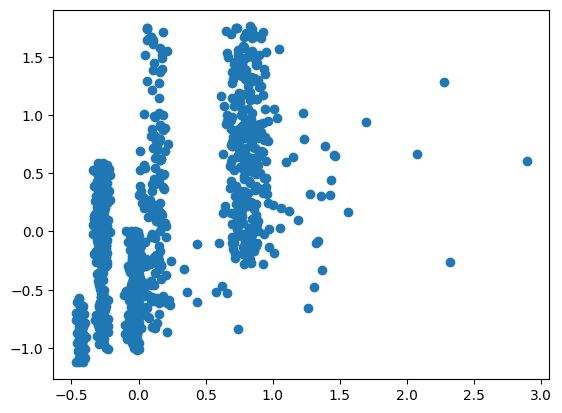

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


x = sales_grouped_outlats['avg_weekly_sales']
y = sales_grouped_outlats['area(sqft)']

plt.scatter(x, y)

plt.show()

##### Scatter Plot for all features

In [56]:
# # draw a scatter plot for detailDF every column combinations

# # Create scatter plot grid
# sns.pairplot(sales_grouped_outlats, kind="scatter")

# # Display the plot
# plt.show()

##### Corelation matrix

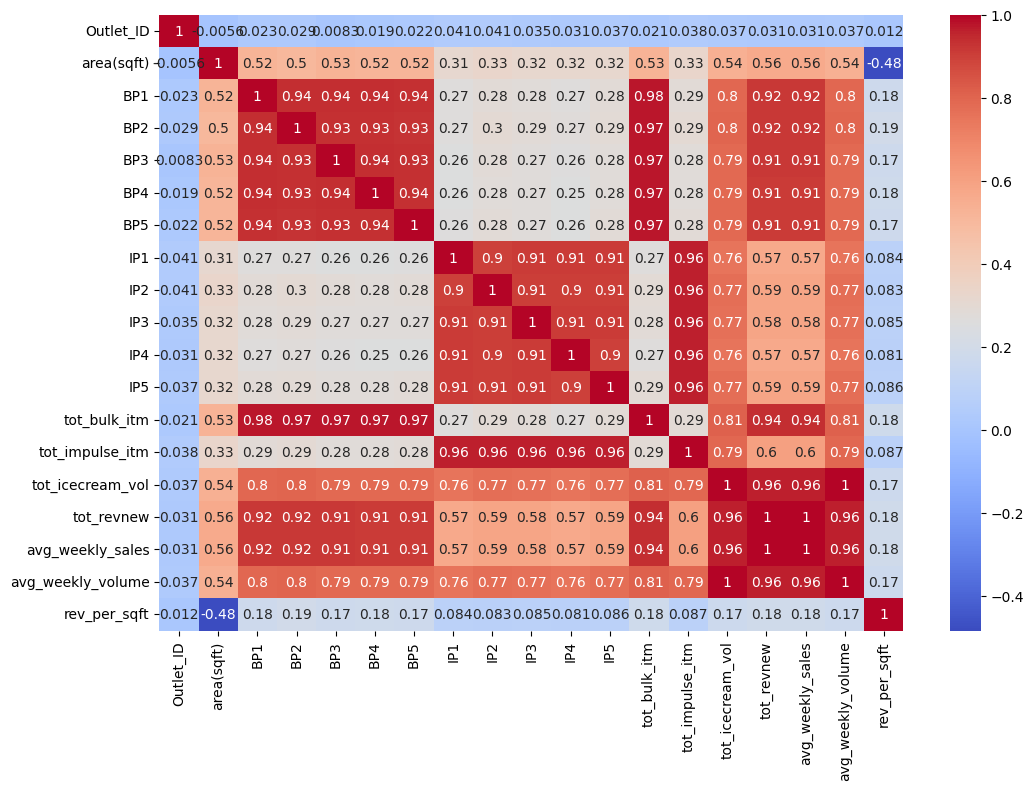

In [57]:
# Create correlation matrix
corr = sales_grouped_outlats.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

##### Dropping Highly co related Features

In [58]:
# sales_grouped_outlats=sales_grouped_outlats.drop(['BP1','BP2','BP3','BP4','BP5','IP1','IP2','IP3','IP4','IP5','tot_revnew','tot_icecream_vol'],axis=1)
# sales_grouped_outlats=sales_grouped_outlats.drop(['tot_revnew','tot_icecream_vol'],axis=1)
sales_grouped_outlats=sales_grouped_outlats.drop(['rev_per_sqft'],axis=1)

In [59]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume
0,7203,0.501101,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.120727,0.306623,0.639389,-0.061494,0.140455,-0.591549,0.257945,-0.076896,-0.278671,-0.278671,-0.076900
1,1878,0.054046,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.413557,0.172972,0.194792,0.440776,0.198739,-0.591549,0.316647,-0.051447,-0.267172,-0.267172,-0.051448
2,1740,0.467616,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.367650,0.469665,0.386844,0.283533,0.211924,-0.591549,0.386826,-0.021023,-0.252009,-0.252009,-0.021027
3,4366,0.346600,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.153741,0.100884,0.659945,0.606892,0.729218,-0.591549,0.510082,0.032410,-0.221168,-0.221168,0.032403
4,8358,0.042884,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.256691,0.756827,0.350626,0.087288,0.603478,-0.591549,0.468074,0.014199,-0.235506,-0.235506,0.014195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,0.791893,1.380363,1.894923,1.401187,1.567190,1.254401,0.802500,1.073379,0.268598,0.708419,0.989490,1.592262,0.876313,1.395650,1.230162,1.230162,1.395645
947,9541,0.444706,1.421617,1.826049,1.229008,1.651832,1.784331,1.244970,1.407606,1.626860,1.239785,1.171412,1.675700,1.530156,1.725122,1.432290,1.432290,1.725121
948,9672,0.943163,1.790429,2.209272,2.520780,1.873473,2.314261,1.001367,1.109324,1.035826,0.884028,0.587044,2.256909,1.051557,1.838204,1.697016,1.697016,1.838200
949,9841,-0.521369,0.423267,0.720530,0.471586,0.496510,0.451585,-0.008009,-0.076060,-0.059514,-0.297978,-0.167017,0.571581,-0.146302,0.389376,0.362501,0.362501,0.389373


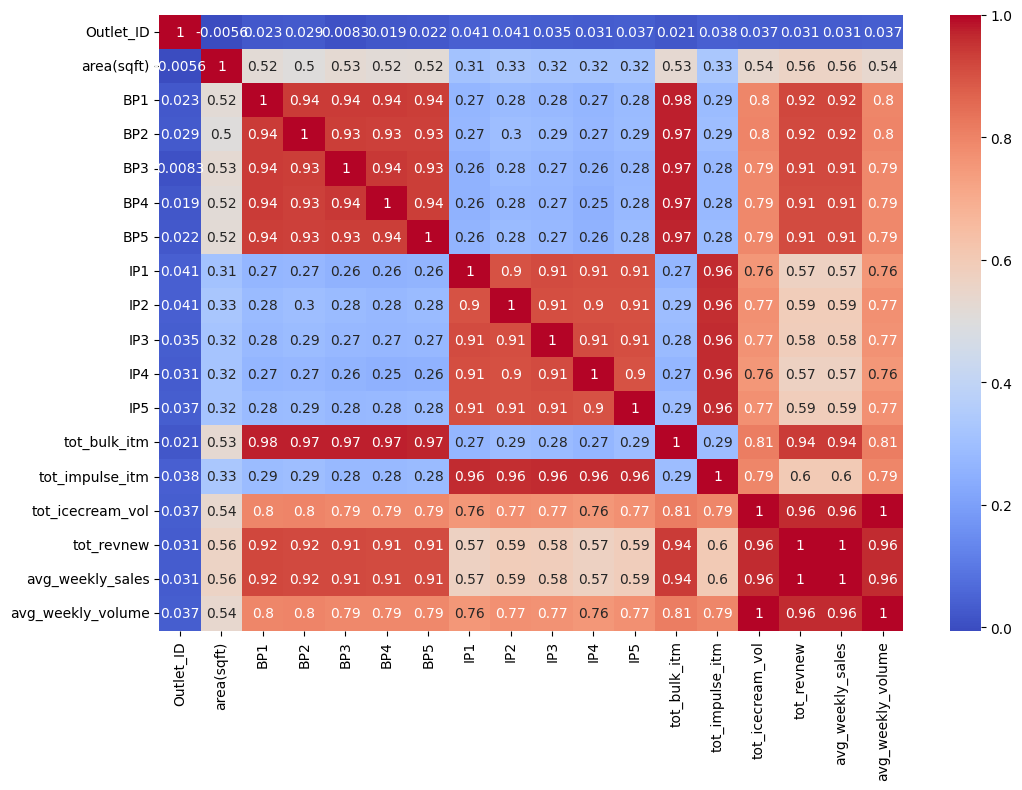

In [60]:
# Create correlation matrix
corr = sales_grouped_outlats.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

# Training the Model

## K means

In [61]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Load data from csv file into pandas DataFrame
# data = sales_grouped_outlats

# # Select features for k-means clustering
# X = data.drop(['Outlet_ID'], axis=1)

# # Initialize empty list to store inertia values
# inertias = []

# # Define range of k values to try
# k_range = range(1, 11)

# # Loop over k values and fit k-means clustering model for each value of k
# for k in k_range:
#     kmeans = KMeans(n_clusters=k,init='k-means++', n_init=2000, max_iter=500,tol=0.000001)
#     kmeans.fit(X)
#     # Append inertia value to list
#     inertias.append(kmeans.inertia_)

# # Plot elbow curve to visualize inertia values
# plt.plot(k_range, inertias)
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow method for K-means clustering')
# plt.show()


In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data from csv file into pandas DataFrame
data = sales_grouped_outlats

n_clusters=10
iterations=500

# Select features for k-means clustering
X = data.drop(['Outlet_ID'], axis=1)

# Initialize and fit k-means clustering model
kmeans = KMeans(n_clusters=3,init='k-means++', n_init=2000, max_iter=500,tol=0.000001 ) # set number of clusters
kmeans.fit(X)

# Get predicted cluster labels and centroids
labels = kmeans.predict(X)




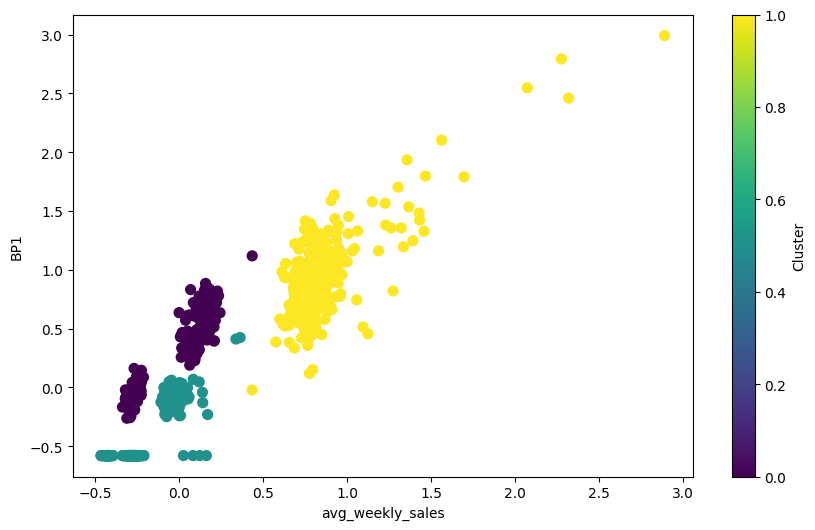

In [63]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'avg_weekly_sales'
featur_2 = 'BP1'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

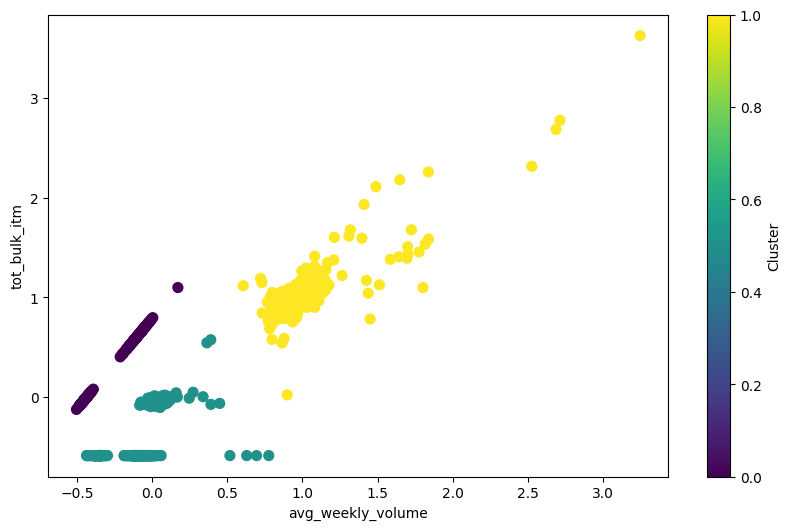

In [64]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'avg_weekly_volume'
featur_2 = 'tot_bulk_itm'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

In [65]:
# Create a DataFrame from the array of cluster lables
clusters_df_Km = pd.DataFrame(labels, columns=['Clusters'])

In [66]:
clusters_df_Km

,Clusters
0,1
1,1
2,1
3,1
4,1
...,...
946,2
947,2
948,2
949,1


In [67]:
cluster_sizes_Km=clusters_df_Km.groupby(['Clusters']).size().reset_index(name='counts')


In [68]:
cluster_sizes_Km

,Clusters,counts
0,0,229
1,1,419
2,2,303


In [69]:
min_cluster_size=cluster_sizes_Km['counts'].min()

In [70]:
outlats_with_clusters_Km = pd.concat([sales_grouped_outlats_before_normalize, clusters_df_Km], axis=1)
df_for_optimization_Km=outlats_with_clusters_Km[['Outlet_ID','area(sqft)','tot_revnew','tot_icecream_vol','Clusters','avg_weekly_sales','avg_weekly_volume']]

In [71]:
outlats_with_clusters_Km

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume,rev_per_sqft,Clusters
0,7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,291076.67,579.10,617.12,1
1,1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,300528.33,600.67,871.52,1
2,1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,312992.50,626.45,677.23,1
3,4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,338344.17,671.73,790.83,1
4,8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,326558.33,656.30,955.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,1531347.50,1827.03,2763.33,2
947,9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,1697497.50,2106.25,3725.31,2
948,9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,1915104.17,2202.08,3207.43,2
949,9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,818124.17,974.25,4505.50,1


In [72]:
df_for_optimization_Km

,Outlet_ID,area(sqft),tot_revnew,tot_icecream_vol,Clusters,avg_weekly_sales,avg_weekly_volume
0,7203,5660,3492920.0,6949.2,1,291076.67,579.10
1,1878,4138,3606340.0,7208.0,1,300528.33,600.67
2,1740,5546,3755910.0,7517.4,1,312992.50,626.45
3,4366,5134,4060130.0,8060.8,1,338344.17,671.73
4,8358,4100,3918700.0,7875.6,1,326558.33,656.30
...,...,...,...,...,...,...,...
946,9465,6650,18376170.0,21924.4,2,1531347.50,1827.03
947,9541,5468,20369970.0,25275.0,2,1697497.50,2106.25
948,9672,7165,22981250.0,26425.0,2,1915104.17,2202.08
949,9841,2179,9817490.0,11691.0,1,818124.17,974.25


In [73]:
# # create a csv file for the optimization data frame
# df_for_optimization_Km.to_csv('df_for_optimization_Km.csv', index=False)

### Evaluation values for clusters

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

# Calculate Inertia
inertia = kmeans.inertia_

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, kmeans.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, kmeans.labels_)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, kmeans.labels_)

# Print the results
print("Inertia:", inertia)
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)


Inertia: 1708.042814912565
Silhouette Coefficient: 0.5734006606441465
Davies-Bouldin Index: 0.6484792682515691
Calinski-Harabasz Index: 1583.982370352474


In [75]:
# Inertia: low is better
# Silhouette Coefficient: 1 is better 0 is bad 78
# Davies-Bouldin Index: lower is better 
# Calinski-Harabasz Index: higher is better

# current:
# Inertia: 1624.8390289580102
# Silhouette Coefficient: 0.571682524815775
# Davies-Bouldin Index: 0.6474222434287352
# Calinski-Harabasz Index: 1522.9009219761501




# Robust scaler :
#     Inertia: 621.03687827908
#     Silhouette Coefficient: 0.44268442259602675
#     Davies-Bouldin Index: 0.9435926056629504
#     Calinski-Harabasz Index: 1049.0538033906232

# z-score scaler :
    # Inertia: 1240.607445537912
    # Silhouette Coefficient: 0.4557139413557797
    # Davies-Bouldin Index: 0.9449081998290716
    # Calinski-Harabasz Index: 1096.4018238519627
    
# StandardScaler normalization :
    # Inertia: 1241.9091416220742
    # Silhouette Coefficient: 0.45568396168834024
    # Davies-Bouldin Index: 0.9448579814654641
    # Calinski-Harabasz Index: 1096.40589163369
    
# MinMaxScaler normalization :
    # Inertia: 46.33295208716464
    # Silhouette Coefficient: 0.43591515893768984
    # Davies-Bouldin Index: 0.8959557985040695
    # Calinski-Harabasz Index: 976.159251870873

## DB scan

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load data from csv file into pandas DataFrame
data = sales_grouped_outlats

# Select features for DBSCAN clustering
X = data.drop(['Outlet_ID'], axis=1)

# Normalize data using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize and fit DBSCAN clustering model
dbscan = DBSCAN(eps=2.5, min_samples=15) # set hyperparameters
dbscan.fit(X)

# Get predicted cluster labels
labels_DB = dbscan.labels_



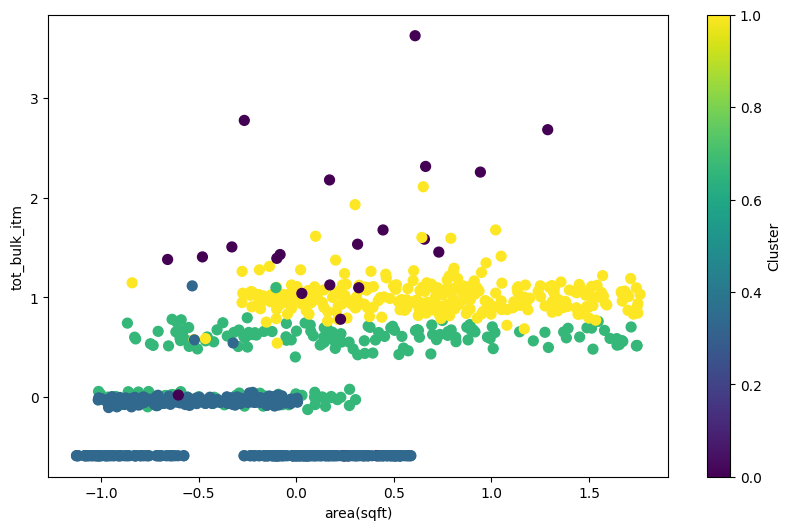

In [77]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'area(sqft)'
featur_2 = 'tot_bulk_itm'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels_DB, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

In [78]:
# Create a DataFrame from the array of cluster lables
clusters_df_DB = pd.DataFrame(labels_DB, columns=['Clusters'])

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

# Calculate Inertia
# inertia = dbscan.inertia_

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, dbscan.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, dbscan.labels_)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, dbscan.labels_)

# Print the results
# print("Inertia:", inertia)
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Coefficient: 0.5597915198765697
Davies-Bouldin Index: 1.0407073811720893
Calinski-Harabasz Index: 1229.7499696412112


In [80]:
# Inertia: low is better
# Silhouette Coefficient: 1 is better 0 is bad 78
# Davies-Bouldin Index: lower is better 
# Calinski-Harabasz Index: higher is better

# DB try 1

# Inertia: 838.004466765913
# Silhouette Coefficient: 0.5261628165810733
# Davies-Bouldin Index: 1.908849469919231
# Calinski-Harabasz Index: 728.2991992932272

# Inertia: 838.004466765913
# Silhouette Coefficient: 0.46109338839673375
# Davies-Bouldin Index: 0.9988008081524068
# Calinski-Harabasz Index: 1832.9985670350884

## Optics

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Load data from csv file into pandas DataFrame
data = sales_grouped_outlats

# Select features for OPTICS clustering
X = data.drop(['Outlet_ID'], axis=1)

# Normalize data using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize and fit OPTICS clustering model
optics = OPTICS(min_samples=10, xi=.05, min_cluster_size=0.04)
optics.fit(X)

# Get predicted cluster labels
labels_opt = optics.labels_


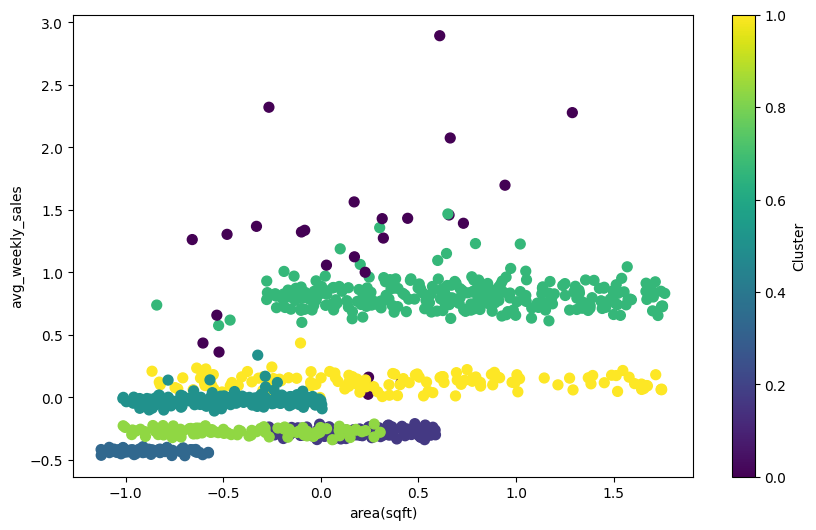

In [82]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'area(sqft)'
featur_2 = 'avg_weekly_sales'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels_opt, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

In [83]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume
0,7203,0.501101,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.120727,0.306623,0.639389,-0.061494,0.140455,-0.591549,0.257945,-0.076896,-0.278671,-0.278671,-0.076900
1,1878,0.054046,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.413557,0.172972,0.194792,0.440776,0.198739,-0.591549,0.316647,-0.051447,-0.267172,-0.267172,-0.051448
2,1740,0.467616,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.367650,0.469665,0.386844,0.283533,0.211924,-0.591549,0.386826,-0.021023,-0.252009,-0.252009,-0.021027
3,4366,0.346600,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.153741,0.100884,0.659945,0.606892,0.729218,-0.591549,0.510082,0.032410,-0.221168,-0.221168,0.032403
4,8358,0.042884,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.256691,0.756827,0.350626,0.087288,0.603478,-0.591549,0.468074,0.014199,-0.235506,-0.235506,0.014195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,0.791893,1.380363,1.894923,1.401187,1.567190,1.254401,0.802500,1.073379,0.268598,0.708419,0.989490,1.592262,0.876313,1.395650,1.230162,1.230162,1.395645
947,9541,0.444706,1.421617,1.826049,1.229008,1.651832,1.784331,1.244970,1.407606,1.626860,1.239785,1.171412,1.675700,1.530156,1.725122,1.432290,1.432290,1.725121
948,9672,0.943163,1.790429,2.209272,2.520780,1.873473,2.314261,1.001367,1.109324,1.035826,0.884028,0.587044,2.256909,1.051557,1.838204,1.697016,1.697016,1.838200
949,9841,-0.521369,0.423267,0.720530,0.471586,0.496510,0.451585,-0.008009,-0.076060,-0.059514,-0.297978,-0.167017,0.571581,-0.146302,0.389376,0.362501,0.362501,0.389373


In [84]:
# Create a DataFrame from the array of cluster lables
clusters_df_DB_optics = pd.DataFrame(labels_opt, columns=['Clusters'])

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

# Calculate Inertia
# inertia = optics.inertia_

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, optics.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, optics.labels_)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, optics.labels_)

# Print the results
# print("Inertia:", inertia)
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Coefficient: 0.5832439461727946
Davies-Bouldin Index: 0.8648765287224233
Calinski-Harabasz Index: 1114.890007119191


In [86]:
# Inertia: low is better
# Silhouette Coefficient: 1 is better 0 is bad 78
# Davies-Bouldin Index: lower is better 
# Calinski-Harabasz Index: higher is better

# Silhouette Coefficient: 0.5832439461727946
# Davies-Bouldin Index: 0.864876528722423
# Calinski-Harabasz Index: 1114.890007119191


In [87]:
sales_grouped_outlats_before_normalize

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume,rev_per_sqft
0,7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,291076.67,579.10,617.12
1,1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,300528.33,600.67,871.52
2,1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,312992.50,626.45,677.23
3,4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,338344.17,671.73,790.83
4,8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,326558.33,656.30,955.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,1531347.50,1827.03,2763.33
947,9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,1697497.50,2106.25,3725.31
948,9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,1915104.17,2202.08,3207.43
949,9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,818124.17,974.25,4505.50


In [88]:
outlats_with_clusters_optics = pd.concat([sales_grouped_outlats_before_normalize, clusters_df_DB_optics], axis=1)
df_for_optimization_optics=outlats_with_clusters_optics[['Clusters','Outlet_ID','area(sqft)','tot_revnew','tot_icecream_vol','avg_weekly_sales','avg_weekly_volume']]

In [89]:
cluster_sizes_optics=clusters_df_DB_optics.groupby(['Clusters']).size().reset_index(name='counts')

In [90]:
cluster_sizes_optics

,Clusters,counts
0,-1,26
1,0,161
2,1,70
3,2,183
4,3,282
5,4,99
6,5,130


In [91]:
# # create a csv file for the optimization data frame
# df_for_optimization.to_csv('df_for_optimization_optics.csv', index=False)

# Optimization

In [92]:
df_for_optimization=df_for_optimization_Km

In [93]:
df_for_optimization

,Outlet_ID,area(sqft),tot_revnew,tot_icecream_vol,Clusters,avg_weekly_sales,avg_weekly_volume
0,7203,5660,3492920.0,6949.2,1,291076.67,579.10
1,1878,4138,3606340.0,7208.0,1,300528.33,600.67
2,1740,5546,3755910.0,7517.4,1,312992.50,626.45
3,4366,5134,4060130.0,8060.8,1,338344.17,671.73
4,8358,4100,3918700.0,7875.6,1,326558.33,656.30
...,...,...,...,...,...,...,...
946,9465,6650,18376170.0,21924.4,2,1531347.50,1827.03
947,9541,5468,20369970.0,25275.0,2,1697497.50,2106.25
948,9672,7165,22981250.0,26425.0,2,1915104.17,2202.08
949,9841,2179,9817490.0,11691.0,1,818124.17,974.25


In [94]:
clustervise_df=df_for_optimization.groupby(['Clusters'])[['area(sqft)','tot_revnew','tot_icecream_vol','avg_weekly_sales','avg_weekly_volume']].mean().reset_index()

In [95]:
clustervise_df

,Clusters,area(sqft),tot_revnew,tot_icecream_vol,avg_weekly_sales,avg_weekly_volume
0,0,4061.737991,5.799400e+06,5224.266376,4.832834e+05,435.355328
1,1,2959.949881,4.411131e+06,7141.707399,3.675942e+05,595.142315
2,2,6226.353135,1.472666e+07,18188.272607,1.227222e+06,1515.689439


In [96]:
# create a csv file
clustervise_df[['Clusters','area(sqft)','avg_weekly_sales','avg_weekly_volume']].to_csv('clustervise_df.csv', index=False)

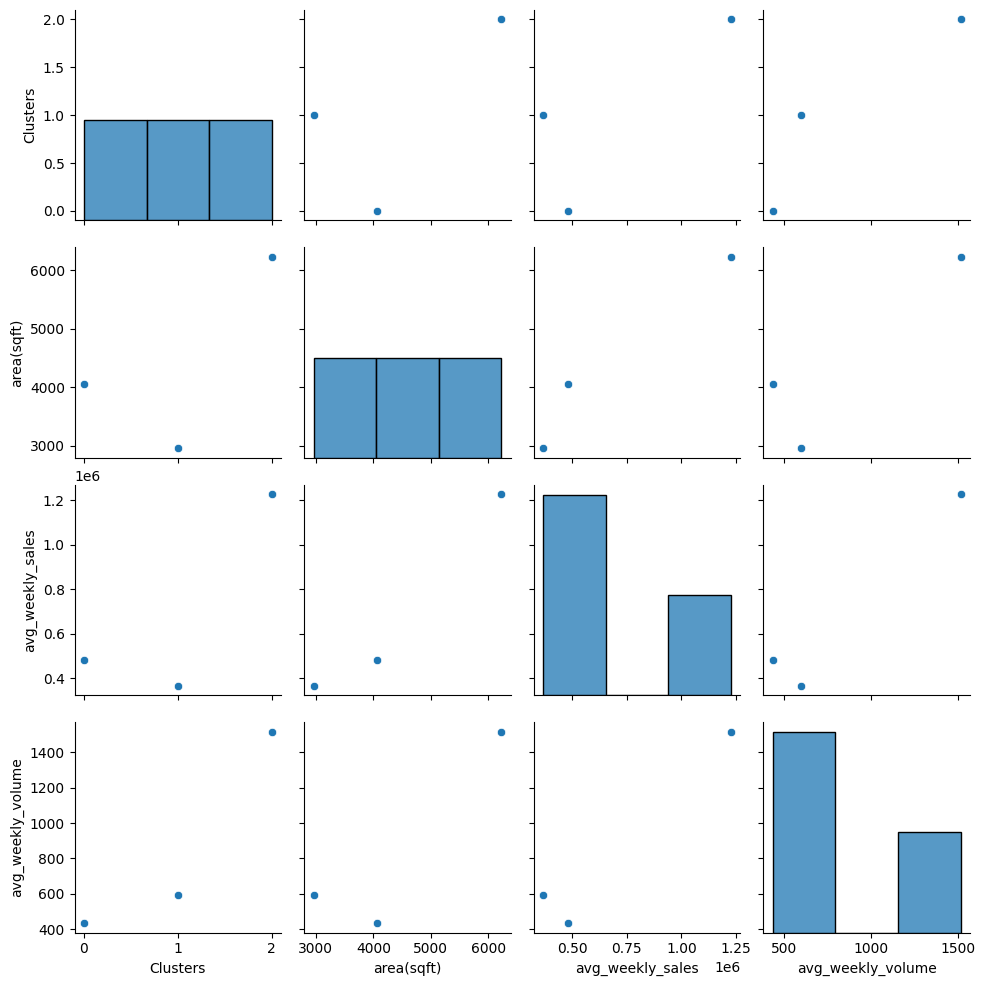

In [97]:
# draw a scatter plot for detailDF every column combinations

# Create scatter plot grid
sns.pairplot(clustervise_df[['Clusters','area(sqft)','avg_weekly_sales','avg_weekly_volume']], kind="scatter")

# Display the plot
plt.show()

In [98]:
freezer_data

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [99]:
freezer_data['cost_per_week']=freezer_data['Power and maitainance Cost (LKR) per 100 hours']*1.68

In [100]:
freezer_data

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours,cost_per_week
0,ChillMaster,M001,55,2500,4200.0
1,FreezeZone,M002,75,2800,4704.0
2,CoolTech,M003,120,3200,5376.0
3,mini CoolTech,M004,30,1800,3024.0
4,IceBlast Pro,M005,150,3500,5880.0
5,IceBlast,M006,65,2700,4536.0
6,FreezeTech,M007,100,3000,5040.0
7,FreezeTech 3.0,M008,25,1600,2688.0
8,ChillTech,M009,80,2800,4704.0
9,IceTech,M010,200,4500,7560.0


In [101]:
cluster_data_for_freezers=freezer_data.copy()

In [102]:
# loop through the cluster data frame
for index, row in clustervise_df.iterrows():
    freezer_data[f'ROI cluster {row["Clusters"]}']=(row['avg_weekly_sales'])/(freezer_data['cost_per_week'])
    freezer_data[f'ISR cluster {row["Clusters"]}']=(row['avg_weekly_volume'])/freezer_data['Volume Capacity (Liters)']
    freezer_data[f'ROI/ISR cluster {row["Clusters"]}']=((row['avg_weekly_sales'])/freezer_data['cost_per_week'])/((row['avg_weekly_volume'])/freezer_data['Volume Capacity (Liters)'])
    freezer_data[f'weekly profit per liter cluster {row["Clusters"]}']=(row['avg_weekly_sales']-freezer_data['cost_per_week'])/(row['avg_weekly_volume'])
    freezer_data[f'profit if choose this fridge for {row["Clusters"]}']=(row['avg_weekly_sales'])-((row['avg_weekly_volume'])/freezer_data['Volume Capacity (Liters)'])*freezer_data['cost_per_week']

In [103]:
freezer_data

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours,cost_per_week,ROI cluster 0.0,ISR cluster 0.0,ROI/ISR cluster 0.0,weekly profit per liter cluster 0.0,profit if choose this fridge for 0.0,ROI cluster 1.0,ISR cluster 1.0,ROI/ISR cluster 1.0,weekly profit per liter cluster 1.0,profit if choose this fridge for 1.0,ROI cluster 2.0,ISR cluster 2.0,ROI/ISR cluster 2.0,weekly profit per liter cluster 2.0,profit if choose this fridge for 2.0
0,ChillMaster,M001,55,2500,4200.0,115.067465,7.915551,14.536886,1100.442147,450038.035260,87.522437,10.820769,8.088375,610.600569,322147.005090,292.195635,27.557990,10.602937,806.907824,1.111478e+06
1,FreezeZone,M002,75,2800,4704.0,102.738808,5.804738,17.699130,1099.284472,455977.865038,78.145033,7.935231,9.847859,609.753713,330266.910421,260.888960,20.209193,12.909420,806.575302,1.132158e+06
2,CoolTech,M003,120,3200,5376.0,89.896457,3.627961,24.778782,1097.740905,463779.432507,68.376904,4.959519,13.787002,608.624571,340931.860706,228.277840,12.630745,18.073188,806.131939,1.159319e+06
3,mini CoolTech,M004,30,1800,3024.0,159.815923,14.511844,11.012792,1103.143388,439399.534166,121.558941,19.838077,6.127557,612.576567,307603.891064,405.827271,50.522981,8.032528,807.683708,1.074440e+06
4,IceBlast Pro,M005,150,3500,5880.0,82.191046,2.902369,28.318608,1096.583230,466217.422341,62.516027,3.967615,15.756574,607.777715,344264.657671,208.711168,10.104596,20.655072,805.799417,1.167807e+06
5,IceBlast,M006,65,2700,4536.0,106.543949,6.697774,15.907366,1099.670363,452902.247093,81.039294,9.156036,8.850915,610.035999,326062.458866,270.551514,23.318299,11.602541,806.686143,1.121450e+06
6,FreezeTech,M007,100,3000,5040.0,95.889554,4.353553,22.025584,1098.512688,461341.442672,72.935364,5.951423,12.255113,609.189142,337599.063742,243.496362,15.156894,16.065056,806.353621,1.150831e+06
7,FreezeTech 3.0,M008,25,1600,2688.0,179.792913,17.414213,10.324493,1103.915172,436473.946365,136.753808,23.805693,5.744584,613.141138,303604.534707,456.555680,60.627578,7.530495,807.905390,1.064255e+06
8,ChillTech,M009,80,2800,4704.0,102.738808,5.441942,18.879072,1099.284472,457684.457921,78.145033,7.439279,10.504383,609.753713,332599.868296,260.888960,18.946118,13.770048,806.575302,1.138099e+06
9,IceTech,M010,200,4500,7560.0,63.926369,2.176777,29.367445,1092.724313,466826.919799,48.623576,2.975712,16.340151,604.954861,345097.856912,162.330908,7.578447,21.420075,804.691011,1.169929e+06


9    M010
Name: Model Number, dtype: object


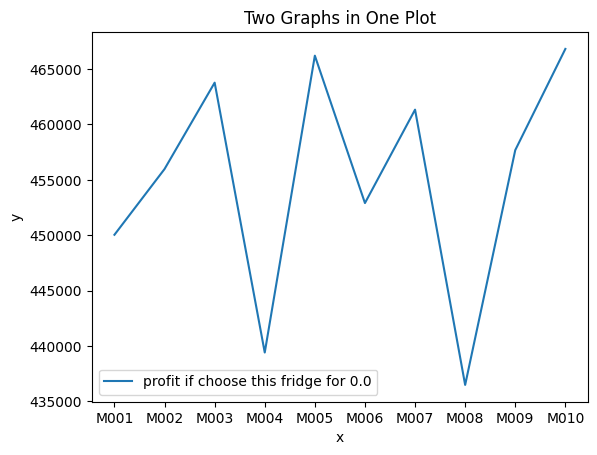

9    M010
Name: Model Number, dtype: object


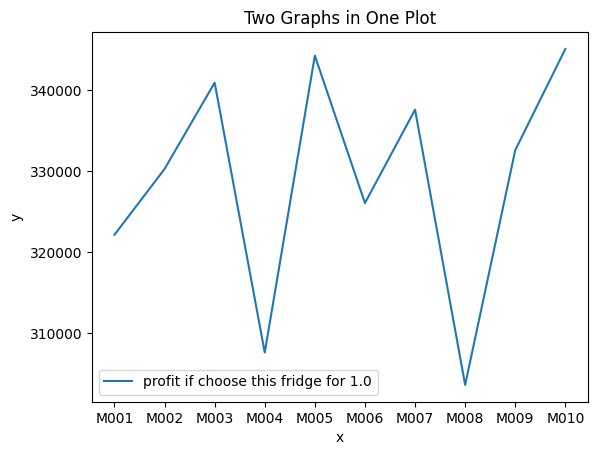

9    M010
Name: Model Number, dtype: object


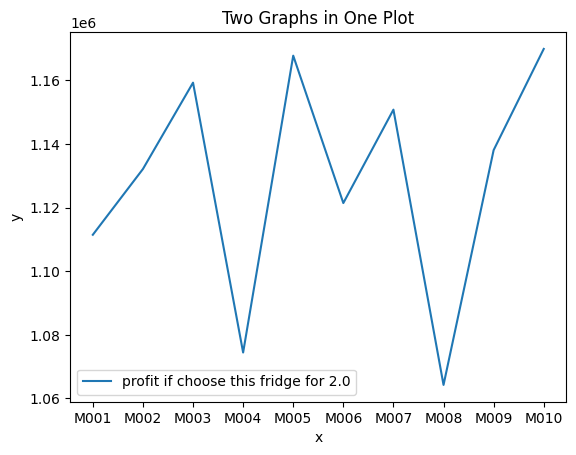

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

fridge_rec=[]
# iterate over the tables
for x in range(0,3):
    # create a figure and axis object
    fig, ax = plt.subplots()

    # # # plot the first graph
    # y1 = 'weekly profit per liter cluster ' + str(x)+'.0'
    # ax.plot(freezer_data['Model Number'], freezer_data[y1], label=y1)

    # # plot the second graph
    # y = 'ROI/ISR cluster ' + str(x)+'.0'
    # ax.plot(freezer_data['Model Number'], freezer_data[y], label=y)
    
    # plot the first graph
    y = 'profit if choose this fridge for ' + str(x)+'.0'
    ax.plot(freezer_data['Model Number'], freezer_data[y], label=y)
    maxvalue=freezer_data[y].max()
    print(freezer_data.loc[freezer_data[y] == maxvalue, 'Model Number'])
    fridge_rec.append(freezer_data.loc[freezer_data[y] == maxvalue, 'Model Number'].values[0])

    # set axis labels, title, and legend
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Two Graphs in One Plot')
    ax.legend()

    # display the plot
    plt.show()

In [107]:
fridge_rec=pd.DataFrame(fridge_rec,columns=['Recomended_fridge_Model_Number'])

In [109]:
clustervise_df=pd.concat([clustervise_df,fridge_rec],axis=1)

In [110]:
clustervise_df

,Clusters,area(sqft),tot_revnew,tot_icecream_vol,avg_weekly_sales,avg_weekly_volume,Recomended_fridge_Model_Number
0,0,4061.737991,5.799400e+06,5224.266376,4.832834e+05,435.355328,M010
1,1,2959.949881,4.411131e+06,7141.707399,3.675942e+05,595.142315,M010
2,2,6226.353135,1.472666e+07,18188.272607,1.227222e+06,1515.689439,M010
